In [26]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.signal as sig

np.set_printoptions(6, suppress=True)

plt.style.use([
    'grid',
    'notebook'
])

In [27]:
# design low pass filter
filter = sig.butter(1, .01, 'lowpass')


def fft(signal, sampling_time):
    fft = np.fft.fft(signal)
    N = signal.shape[0]

    f = np.fft.fftfreq(len(signal), sampling_time)

    K = N // 2

    freqs = f[:K]
    amplitudes = np.abs(fft)[:K] * (1 / N)

    phase = np.angle(fft)[:K]

    return freqs, amplitudes, phase

In [28]:
A_vertices = []
B_vertices = []

Ts = 1

r = .31
mu = .40
sigma = .55
A2 = np.pi * r**2

Kb = 15.92e-2

In [29]:
h1 = np.load('./data/level3.npy')
h2 = np.load('./data/level4.npy')

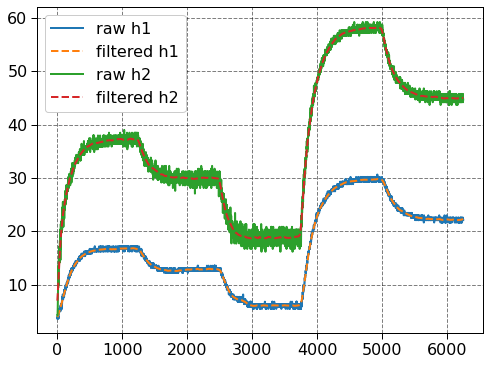

In [30]:
filtered_h1 = sig.filtfilt(filter[0], filter[1], h1)
filtered_h2 = sig.filtfilt(filter[0], filter[1], h2)

plt.plot(h1[::2], label='raw h1')
plt.plot(filtered_h1[::2], '--', label='filtered h1')

plt.plot(h2[::2], label='raw h2')
plt.plot(filtered_h2[::2], '--', label='filtered h2')

plt.legend()

h1 = filtered_h1
h2 = filtered_h2

In [31]:
k1 = 29.4
b1 = 83.93

k2 = 165.48
b2 = 147.01

k3 = 16.46
b3 = 156.93

In [32]:
diff = h2 - h1

q34 = (k1*(h2-h1) - b1)
qout = (k2*np.sqrt(h1) - b2)

l2 = np.cos(2.5*np.pi * (h1 - mu)) / (sigma * np.sqrt(2 * np.pi))
l3 = np.exp(-((h1 - mu)**2) / (2 * sigma**2))

A1 = ((3*r)/5) * (2.7*r - (l2 * l3))

Z1 = 1/A1

Z1_bounds = np.array([
    np.min(Z1), np.max(Z1)
])

for z1 in Z1_bounds:
    Ai = np.array([
        [z1, -z1],
        [-1/A2, 0]
    ])

    Bi = np.array([
        [0],
        [Kb*z1]
    ])

    print(np.linalg.eigvals(Ai))
    # print(Ai)

[ 8.832242 -2.408892]
[ 8.832242 -2.408892]


In [33]:
Z1_bounds

array([6.42335, 6.42335])

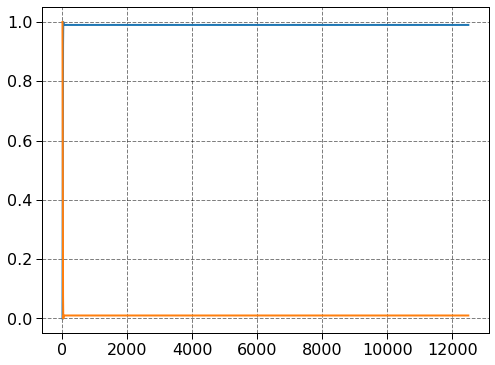

In [34]:
Z1_, Z2_, Z3_ = sp.symbols('Z1 Z2 Z3')

z1_min, z1_max = Z1_bounds
# z2_min, z2_max = Z2_bounds
# z3_min, z3_max = Z3_bounds

M1 = (Z1_ - z1_min) / (z1_max - z1_min)
# N1 = (Z2_ - z2_min) / (z2_max - z2_min)
# P1 = (Z3_ - z3_min) / (z3_max - z3_min)

M2 = 1 - M1
# N2 = 1 - N1
# P2 = 1 - P1

M1_func = sp.lambdify([Z1_], M1)
# N1_func = sp.lambdify([Z2_], N1)
# P1_func = sp.lambdify([Z3_], P1)

M1_values = M1_func(Z1)
# N1_values = N1_func(Z2)
# P1_values = P1_func(Z3)

plt.plot(M1_values)
plt.plot(1-M1_values)

In [35]:
print(' ')
print(M1)
# print(N1)
# print(P1)
print(' ')
print(M2)
# print(N2)
# print(P2)

 
195860931.741203*Z1 - 1258083346.73942
 
1258083347.73942 - 195860931.741203*Z1


In [36]:
for i in range(len(A_vertices)):
    A = A_vertices[i]
    B = B_vertices[i]
    
    np.save(f'./vertices/A_{i}', A)
    np.save(f'./vertices/B_{i}', B)